<a href="https://colab.research.google.com/github/kurniawano/d2w_notes/blob/master/ComputationTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computation Time

A performance of a computer program can be measured using its computation time and its memory space that it occupies. In this section, we will focus on analysing and measuring computation time.

## Asymptotic Notation

Asymptotic notation is a shorthand used to give a quick measure of the behaviour of a function $f(n)$ as $n$ grows large. Here, we will introduce several notations that is common in analysing computer programs.


### Little Oh

This notation is to indicate that $f$ is *asymptotically smaller* than $g$, or in symbols,

$f(x) = o(g(x))$

This is True if and only if

$\lim_{x\to \infty}  \frac{f(x)}{g(x)} = 0$

For example,

$1000x^{1.9} = o(x^2)$

This is because

$\lim_{x\to\infty} \frac{1000x^{1.9}}{x^2} = \lim_{x\to\infty} \frac{1000}{x^{0.1}} = 0$

### Big Oh

Big Oh is the most frequently used notation in computing as it is used to give an upper bound on the growth of a function. 

$f = O(g)$

if and only if,

$\lim_{x\to \infty}\text{sup} \frac{f(x)}{g(x)} < \infty$

Note the word "sup" means superior or above as it indicates the upper bound. 

For example,

$x^2 + 100x+10 = O(x^2)$

This is because

$\lim_{x\to\infty} \text{sup} \frac{x^2+100x+10}{x^2} = 1 < \infty$

### Big Omega

The previous notation "Big Oh" is used to indicate an upper bound. The notation to indicate the lower bound is Big Omega, or simply Omega. 

$f = \Omega(g)$

if and only if there exist a constant $c$ and an $x_0$ such that for all $x\ge x_0$, we have

$f(x) \ge c |g(x)|$

In other words, this simply means that $f(x)$ is greater than or equal to $g(x)$. As you can guess, this sounds like Big-Oh in reverse. 

$f(x) = O(g(x)) \text{ if and only if } g(x) = \Omega(f(x))$

For example,

$x^2  = \Omega(x)$

We will use the definition for Big Oh to prove this by exchanging the terms $f$ and $g$. We are going to prove that

$x = O(x^2)$

This is true because

$\lim_{x\to\infty}\frac{x}{x^2} = \lim_{x\to\infty}\frac{1}{x} < \infty$

Therefore, 

$x^2 = \Omega(x)$

#### Little Omega

This notation is used to denote that one function grows stricly faster than another function.

$f(x) = \omega(g(x))$

if and only if,

$\lim_{x\to\infty} \frac{g(x)}{f(x)} =0$

This is like the reverse of little Oh,

$f(x) = \omega(g(x)) \text{ if and only if } g(x) = o(f(x))$

For example,

$x^{1.5} = \omega(x)$

This is true because

$\lim_{x\to\infty} \frac{x^{1.5}}{x} = \lim_{x\to\infty} x^{0.5} = \lim_{x\to\infty} \frac{1}{\sqrt{x}} = 0$


#### Theta

Sometimes, we want to specify both upper bound and lower bound at the same time. We use this notation,

$f = \Theta(g)$

if and only if,

$f=O(g)$ and $g=O(f)$

For example, 

$10n^3-20n^2+1 = \Theta(n^3)$

We then have to prove both conditions, i.e. $f=O(g)$ and $g=O(f)$. So we will start with the first one.

$10n^3-20n^2+1 = O(n^3)$

This is true because

$\lim_{x\to\infty} \text{sup} \frac{10n^3-20n^2+1}{n^3} = 10 < \infty$

Now, we prove the second condition.

$n^3 = O(10n^3-20n^2+1 )$

This is also true because

$\lim_{x\to\infty} \text{sup} \frac{n^3}{10n^3-20n^2+1} = \frac{1}{10} < \infty$

Therefore,

$10n^3-20n^2+1 = \Theta(n^3)$

#### Analogies with Relation Operators

These asymptotic notations can be understood better in relation to analogies with relational operators of numbers.

| relational operator | asymptotic notation|
|--------------|------------|
| $f = g$    |  $f = \Theta(g)$         |
| $f < g$    |  $f = o(g)$         |
| $f <= g$   | $ f= O(g)$         |
| $f > g$    |  $f = \omega(g)$     |
| $f >= g$   | $f = \Omega(g)$         |



## Measuring Computation Time

We are interested in the trend on the computation time as the number of input changes. For example, considering the sorting algorithms that we have considered thus far. How does the computation time increases as we increase the number of the input array? In analysing this, we are interested in the upper bound, and so we normally use the Big-Oh notation to indicate the upper bound of a computation time of a program.

We can investigate this empirically by creating a list of different sizes, i.e. 10 elements, 100 elements, etc. We can then ask our sorting algorithm to sort these numbers. We can also compare the performance of the sorting algorithm when the input list is already sorted or when it is randomly shuffled. 


### Setup

We generate the input array of integers with different number of elements from 10 up to 10,000, i.e. 10 elments, 100 elements, 1000 elements, and 10,000 elements. We run the sorting algorithms two times, one is when the input array is randomly shuffled and the second one is when the input array is already sorted from the smallest to the largest. We present the results for different algorithms in the next sections.

### Bubble Sort

If we run version 1 of Bubble Sort algorithm on the randomly shuffled array. The output time in seconds are shown here.

```
bubbletime = [5.7220458984375e-06, 2.2649765014648438e-05, 0.0014679431915283203, 0.2126140594482422, 25.051520347595215]
```

We can plot this and see the relationship between the number of elements and the computation time.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


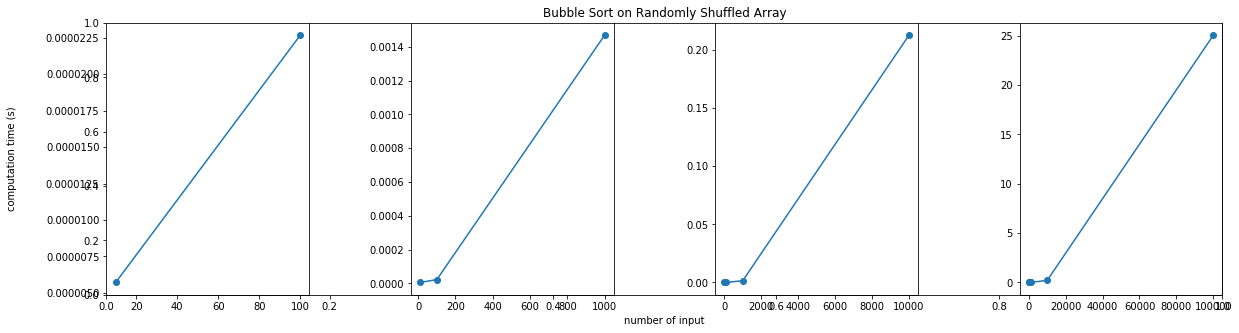

In [0]:
nelements = [10, 100, 1000, 10000, 100000]
bubbletime = [5.7220458984375e-06, 2.2649765014648438e-05, 0.0014679431915283203, 0.2126140594482422, 25.051520347595215]

fig = plt.figure(figsize=(20,5))
plt.title("Bubble Sort on Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nelements)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nelements[:i+1], bubbletime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

We show four plots because it is difficult to see the trend due to the large range in the x and y axis. In the above figures, the first plot only shows the first two data points. The second one, three data points. The third, four data points, and the last, five data points.

We can see that the computation time increases as the input increases and the relationship is not a straight line. In fact, the relationship is more quadratic. To check if it is quadratic, we will square our input and plot it again. If it is, then the plot will display as a straight line.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


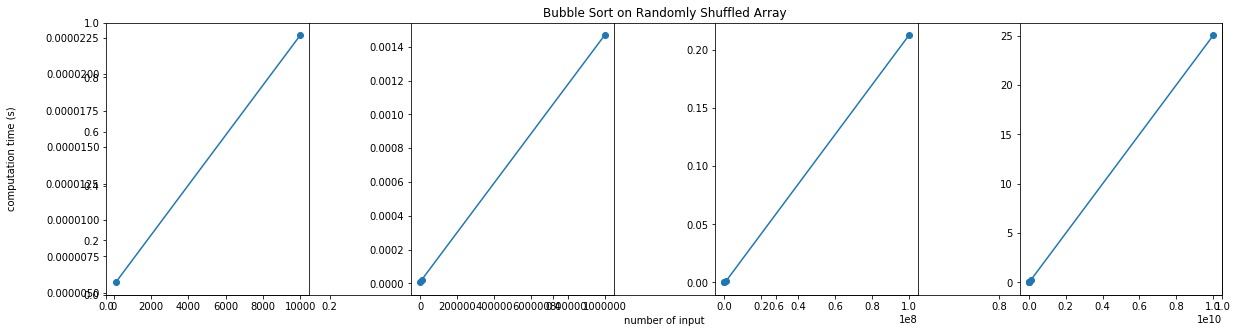

In [0]:
nelements = np.array([10, 100, 1000, 10000, 100000])
nsquared = nelements ** 2
bubbletime = [5.7220458984375e-06, 2.2649765014648438e-05, 0.0014679431915283203, 0.2126140594482422, 25.051520347595215]

fig = plt.figure(figsize=(20,5))
plt.title("Bubble Sort on Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nsquared)):
  subfig = fig.add_subplot(1,len(nsquared)-1,i)  
  subfig.plot(nsquared[:i+1], bubbletime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

Now, all the points fall in a straight line. This means that the computation time of Bubble Sort algorithm is quadratic.

$T(n) = O(n^2)$

On the other hand, this is the computation time when the input is already sorted.

```
bubbletimeSorted = [6.4373016357421875e-06, 1.9073486328125e-06, 4.291534423828125e-06, 3.147125244140625e-05, 0.00030159950256347656]
```

We can plot this again on the same input.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


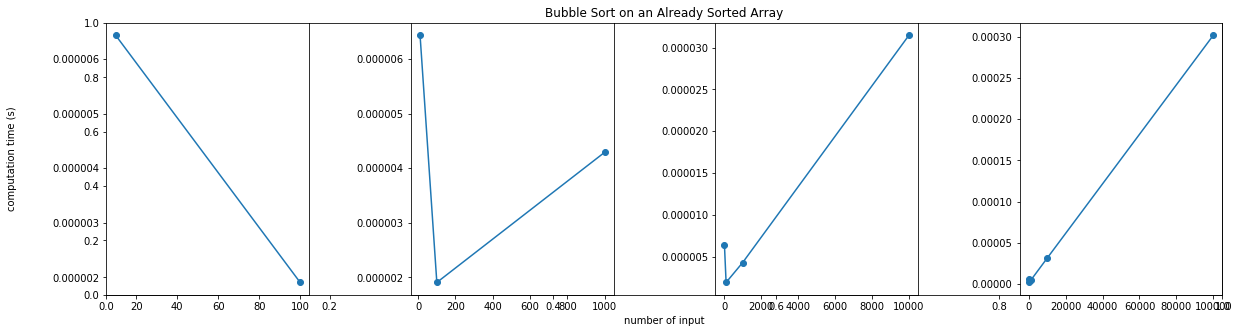

In [0]:
nelements = [10, 100, 1000, 10000, 100000]
bubbletimeSorted = [6.4373016357421875e-06, 1.9073486328125e-06, 4.291534423828125e-06, 3.147125244140625e-05, 0.00030159950256347656]


fig = plt.figure(figsize=(20,5))
plt.title("Bubble Sort on an Already Sorted Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nelements)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nelements[:i+1], bubbletimeSorted[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

Notice that the computation time already falls in a straight line. This shows that when the input is already sorted, the computation time increases linearly instead of quadratically as the input increases. This means that in the best case scenario the computation time is linear.

$T(n) = O(n)$

### Insertion Sort

We can do the same with Insertion Sort Algorithm. Below is the output when the input is randomly shuffled.

```
insertiontime = [6.198883056640625e-06, 7.867813110351562e-06, 0.0006382465362548828, 0.06774091720581055, 6.839613199234009]
```

We can plot this with the same input.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


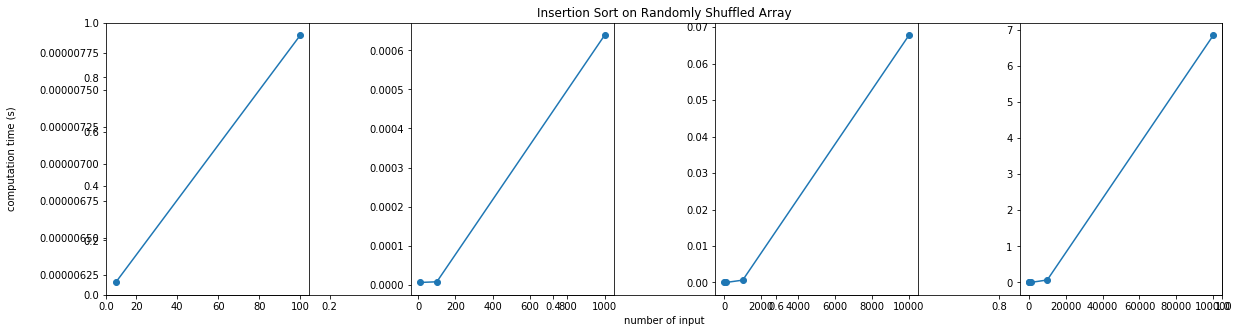

In [0]:
nelements = [10, 100, 1000, 10000, 100000]
insertiontime = [6.198883056640625e-06, 7.867813110351562e-06, 0.0006382465362548828, 0.06774091720581055, 6.839613199234009]

fig = plt.figure(figsize=(20,5))
plt.title("Insertion Sort on Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nelements)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nelements[:i+1], insertiontime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

We can again notice that the computation time increases but not linearly with respect to the input. Let's see what the plot looks like if we square the input.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


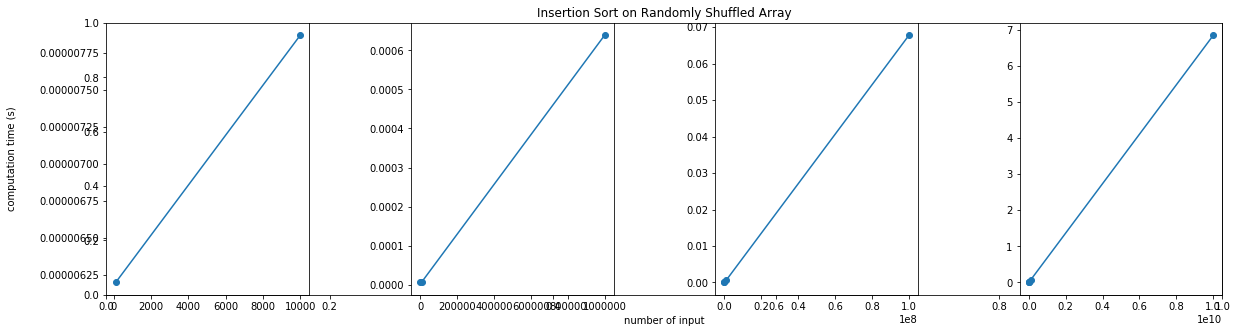

In [0]:
nelements = np.array([10, 100, 1000, 10000, 100000])
nsquared = nelements ** 2
insertiontime = [6.198883056640625e-06, 7.867813110351562e-06, 0.0006382465362548828, 0.06774091720581055, 6.839613199234009]

fig = plt.figure(figsize=(20,5))
plt.title("Insertion Sort on Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nsquared)):
  subfig = fig.add_subplot(1,len(nsquared)-1,i)  
  subfig.plot(nsquared[:i+1], insertiontime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

We again need to zoom into the plot to verify or fit into an equation to check, but later on we will show that indeed the relationship is quadratic. For now, we can say that the computation time for Insertion Sort is quadratic.

$T(n) = O(n^2)$

On the other hand, this is the output when the input is already sorted.

```
insertiontimeSorted = [5.7220458984375e-06, 1.430511474609375e-06, 4.0531158447265625e-06, 3.123283386230469e-05, 0.0003333091735839844]
```

And if we plot, we will see the following.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


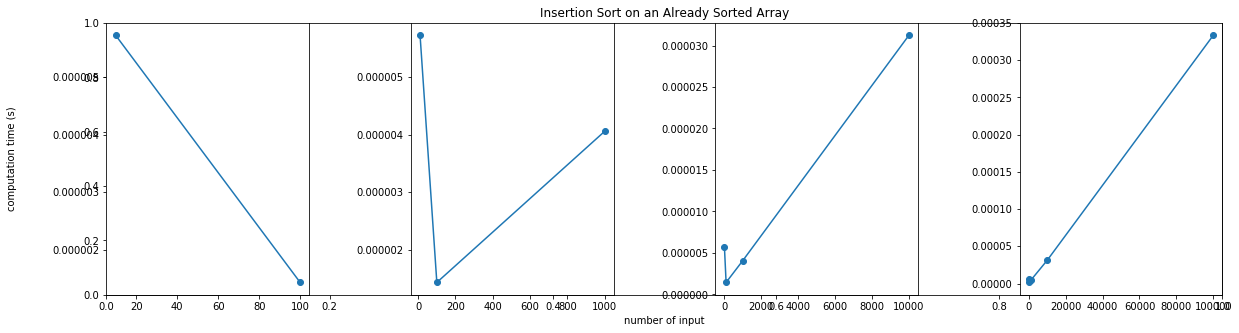

In [0]:
nelements = [10, 100, 1000, 10000, 100000]
insertiontimeSorted = [5.7220458984375e-06, 1.430511474609375e-06, 4.0531158447265625e-06, 3.123283386230469e-05, 0.0003333091735839844]

fig = plt.figure(figsize=(20,5))
plt.title("Insertion Sort on an Already Sorted Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nelements)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nelements[:i+1], insertiontimeSorted[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

We can see that now the points fall roughly in a straight line. So the computation time when the input is already sorted is linearly increasing with the input numbers, similar to Bubble Sort. This means that in the best case scenario, the computation time for Insertion Sort is linear.

$T(n) = O(n)$

### Heapsort

We can now check the computation time for heapsort algorithm. The computation time for randomly shuffled array is as shown below.

```
heapsorttime = [5.0067901611328125e-06, 7.867813110351562e-06, 9.512901306152344e-05, 0.0012400150299072266, 0.015644311904907227, 0.21677017211914062]
```

A quick look actually shows that heapsort is much faster the other two. Let's plot it.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


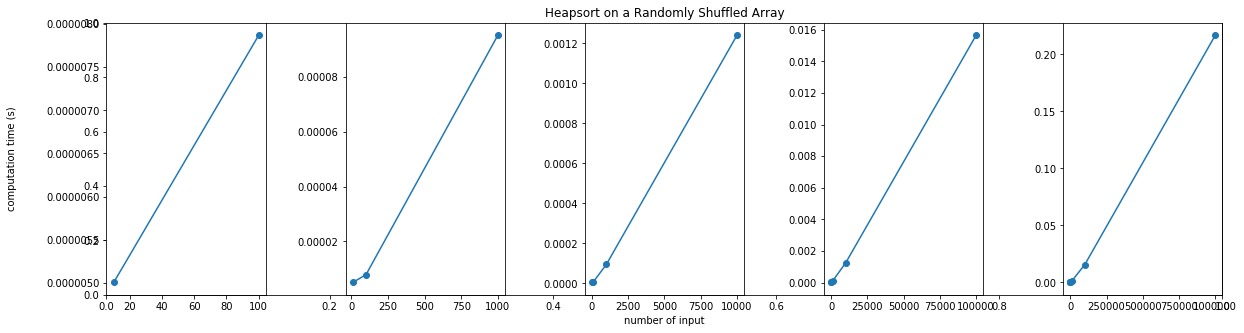

In [0]:
nelements = [10, 100, 1000, 10000, 100000, 1000000]
heapsorttime = [5.0067901611328125e-06, 7.867813110351562e-06, 9.512901306152344e-05, 0.0012400150299072266, 0.015644311904907227, 0.21677017211914062]

fig = plt.figure(figsize=(20,5))
plt.title("Heapsort on a Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nelements)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nelements[:i+1], heapsorttime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

We can see that it is not exactly linear, but it seems slower than quadratic. You can notice that the computation time for 1,000,000 input elements are only about 0.2 seconds. The other algorithms were too slow to compute this amount of input elements and so we only compute up to 100,000 elements. For 100,000 elements, Bubble Sort takes about 25 seconds while Insertion Sort takes about 7 seconds. Compare this with heapsort which only takes 0.016 seconds.

It turns out that the computation time for Heapsort is logarithmic. We can see a linear relationship if the x-axis is computed as $n*log(n)$. See the plot below.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


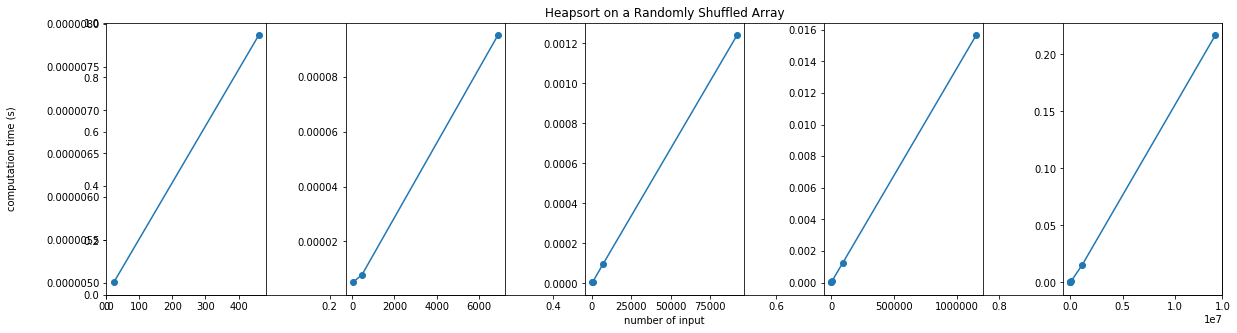

In [0]:
nelements = np.array([10, 100, 1000, 10000, 100000, 1000000])
nlog = nelements * np.log(nelements)
heapsorttime = [5.0067901611328125e-06, 7.867813110351562e-06, 9.512901306152344e-05, 0.0012400150299072266, 0.015644311904907227, 0.21677017211914062]

fig = plt.figure(figsize=(20,5))
plt.title("Heapsort on a Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nlog)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nlog[:i+1], heapsorttime[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

Notice that now the points fall almost in a straight line. This means that the computation time for heapsort is:

$T(n) = O(n\log(n))$

Now, what happens when we run the algorithm on an already sorted list? It turns out, that the computation time for different number of input elements are as follows.

```
heapsorttimeSorted = [1.2874603271484375e-05, 7.3909759521484375e-06, 7.82012939453125e-05, 0.0008978843688964844, 0.009733200073242188, 0.11059808731079102]
```

It turns out that the computation time is still

$T(n) = O(n\log(n))$

We can plot this after modifying the x-axis accordingly.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


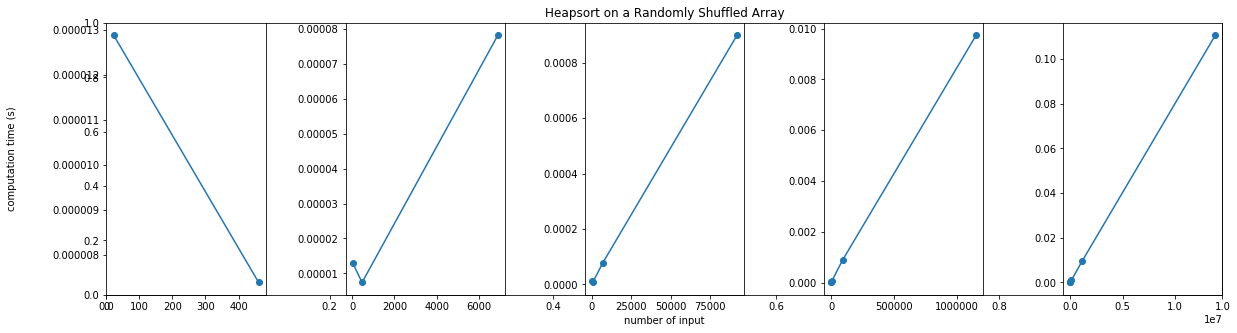

In [0]:
nelements = np.array([10, 100, 1000, 10000, 100000, 1000000])
nlog = nelements * np.log(nelements)
heapsorttimeSorted = [1.2874603271484375e-05, 7.3909759521484375e-06, 7.82012939453125e-05, 0.0008978843688964844, 0.009733200073242188, 0.11059808731079102]

fig = plt.figure(figsize=(20,5))
plt.title("Heapsort on a Randomly Shuffled Array")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("number of input")
ax.set_ylabel("computation time (s)")
ax.yaxis.set_label_coords(-0.08,0.5)

for i in range(1,len(nlog)):
  subfig = fig.add_subplot(1,len(nelements)-1,i)  
  subfig.plot(nlog[:i+1], heapsorttimeSorted[:i+1], '-o')

fig.subplots_adjust(wspace=0.5)

fig.show()

Let's summarize our findings in a table form.

| Sorting Algorithm | Random List   | Sorted List   |
|-------------------|---------------|---------------|
| Bubble Sort       | $O(n^2)$      | $T(n) = O(n)$ |
| Insertion Sort    | $O(n^2)$      | $T(n) = O(n)$ |
| Heapsort          | $O(n\log(n))$ |     $O(n\log(n))$          |

## Analysing Computation Time Using Model

Given a computer program, can we analyse what is the computation time without resolving to the experimentation as we did in the previous section? In this section, we will introduce how we can analyse computer program by looking into the code and applying some computational time model. 

To do so, we are going to indicate using asymptotic notation. In particular we will use the big Oh notation for this purpose.

### Bubble Sort Computation Time

Let's take a look at the pseudocode version 1 for Bubble Sort.

```
Bubble Sort 
Version: 1
Input: array
Output: None, sort in place
Steps:
1. n = length of array
2. For outer_index from 1 to n-1, do:
    2.1 For inner_index from 1 to n-1, do:
        2.1.1 first_number = array[inner_index - 1]
        2.1.2 second_number = array[inner_index]
        2.1.3 if first_number > second_number, do:
            2.1.3.1 swap(first_number, second_number)
```

Computation time:

* step 1: constant time, $O(1)$.
* steps 2: n-1 times, so $O(n-1) = O(n)$
    * step 2.1: n-1 times, so $O(n)$
        * step 2.1.1 to 2.1.3, are all constant time, so it's $3 \times O(1) = O(1)$
        
So we can compute the computation time for Bubble Sort as follows.

$T(n) = O(1) + O(n) \times (O(n) \times( O(1)))$

This can be simplified to

$T(n) = O(1) + O(n) \times O(n)$

$T(n) = O(1) + O(n^2)$

$T(n) = O(n^2)$

This agrees with the previous section when we state that computational time for Bubble Sort is quadratic. We can also say that the computation is polynomial time. 

Let's take a look at version 4 of Bubble Sort.

```
Bubble Sort
Version: 4
Input: array
Output: None, sort in place
Steps:
1. n = length of array
2. swapped = True
3. As long as swapped is True, do:
    3.1 swapped = False
    3.2 new_n = 0
    3.3 For inner_index from 1 to n-1, do:
        3.3.1 first_number = array[inner_index - 1]
        3.3.2 second_number = array[inner_index]
        3.3.3 if first_number > second_number, do:
            3.3.3.1 swap(first_number, second_number)
            3.3.3.2 swapped = True
            3.3.3.3 new_n = inner_index
    3.4 n = new_n
```

Computation time:

* steps 1 and 2 are constant time, it's $2 \times O(1)$ or simply $O(1)$. 
* step 3 is executed as long as there is a swap. In this case, we can consider the worst case scenario. In the wors't case, the number of swap will be the same as $n-1$. In this case the computation time is $O(n)$. In the best case scenario, there is no swap because it is already sorted, and the computation time is $O(1)$. So on average, the computation time is $O(n/2)$, which is the same as $O(n)$. 
    * steps 3.1 and 3.2 are constant time, it's $O(1)$. 
    * step 3.3 is $n-1$ times, so the computation time is $O(n)$. 
        * steps 3.3.1 to 3.3.3 are all constant time, it's $O(1)$. 
    * step 3.4 is also constant time, $O(1)$.
    
    
We can calculate the computation time on *average* as:

$T(n) = 2 \times O(1) + O(n) \times (2\times O(1) + O(n) \times (3\times O(1)) + O(1))$

This can be simplified to

$T(n) = O(1) + O(n) \times(O(1) + O(n) + O(1))$

$T(n) = O(1) + O(n) \times O(n)$

$T(n) = O(1) + O(n^2) $

$T(n) = O(n^2)$

So the optimised Bubble Sort in version 4 is still polynomial time, which is quadratic.





## Insertion Sort Computation Time

Now, let's consider Insertion Sort computation time. We will use version 2 of Insertion Sort pseudocode.

```
Insertion Sort 
Version: 2
Input: array
Output: None, sort in place
Steps:
1. n = length of array
2. For outer_index in Range(from 1 to n-1), do:
    2.1 inner_index = outer_index  # start with the i-th element
    2.2 temporary = array[inner_index]
    2.3 As long as (inner_index > 0) AND (temporary < array[inner_index - 1]), do:
        2.3.1 array[inner_index] = array[inner_index - 1]) # shift to the right
        2.3.2 inner_index = inner_index - 1  # move to the left
    2.4 array[inner_index] = temporary # save temporary to its final position
```

Computation time:

* step 1 is $O(1)$
* step 2 is executed $n-1$, so the time is $O(n)$.
    * steps 2.1 and 2.2 are all constant time, so it is $O(1)$.
    * step 2.3 is executed depending on the actual values in the array. In the worst case it is $n-1$ times, and in the best case it's already ordered and executed as constant time. In average, then the computation time is $O(n/2)$ or simply $O(n)$. 
        * steps 2.3.1 and 2.3.2 are constant time, i.e. $O(1)$.
    * step 2.4 is also constant time, i.e. $O(1)$.
    
We can calculate the computation time as follows.

$T(n) = O(1) + O(n) \times (2 \times O(1) + O(n) \times(O(1)) + O(1) )$

$T(n) = O(1) + O(n) \times ( O(1) + O(n) + O(1) )$

$T(n) = O(1) + O(n) \times  O(n) $

$T(n) = O(1) + O(n^2) $

$T(n) = O(n^2) $

So Insertion sort is similar to Bubble sort in its computational time, which is a polynomial time and it's quadratic relationship with respect to the number of input.

## Heapsort

Now, we will consider heapsort algorithm's computation time. The pseudocode can be written as follows:

```
def heapsort(array):
Input:
  - array: any arbitrary array
Output: None
Steps:
1. call build-max-heap(array)
2. heap_end_pos = length of array - 1 # index of the last element in the heap
3. As long as (heap_end_pos > 0), do:
    3.1 swap( array[0], array[heap_end_pos])
    3.2 heap_end_pos = heap_end_pos -1 # reduce heap size
    3.3 call max-heapify(array[from index 0 to heap_end_pos inclusive], 0)
```

Computation time:

* step 1 depends on computation time for build-max-heap() algorithm. We'll come to this later.
* step 2 is constant time, i.e. $O(1)$
* step 3 is done from $n-1$ , which is the last element in the array, down to 1, which is the second element. This means that it is executed $n-1$ times, so the computation time is $O(n)$.
    * steps 3.1 and 3.2 are constant time, $O(1)$.
    * step 3.3 depends on computation time for max-heapify().
    
To get the computation time for heapsort, we need to check what is the computation time for `build-max-heap()` and `max-heapify`. Let's start with the first one.

### Computation Time for Build-Max-Heap

```
def build-max-heap(array):
Input:
  - array: arbitrary array of integers
Output: None, sort the element in place
Steps:
1. n = length of array
2. starting_index = integer(n / 2) - 1 # start from the middle or non-leaf node
3. For current_index in Range(from starting_index down to 0), do:
    3.1 call max-heapify(array, current_index)
```

Computation time:

* step 1 and 2 are constant time, $O(1)$.
* step 3 is fixed and executed for $n/2$ times. We can say that the computation time is $O(n)$.
* step 3.1 on the other hand depends on the computation time for `max-heapify`.

### Computation Time for Max-Heapify

```
def max-heapify(A, i):
version: 2
Input: 
  - A = array storing the heap
  - i = index of the current node to restore max-heap property
Output: None, restore the element in place
Steps:
1. current_i = i # current index starting from input i
2. swapped = True
3. As long as ( left(current_i) < length of array) AND swapped, do:
    3.1 swapped = False
    3.2 max_child_i = get the index of largest child of the node current_i
    3.3 if array[max_child_i] > array[current_i], do:
        3.3.1 swap( array[max_child_i], array[current_i])
        3.3.2 swapped = True
    3.3 current_i = max_child_i # move to the index of the largest child
```

Computation time for `max-heapify()`:
* step 1 and 2 are constant time, $O(1)$.
* step 3, in average is executed in $O(\log(n))$ time.
    * steps 3.1 to 3.4 are all constant time, $O(1)$.
        * steps 3.3.1 and 3.3.2 are also constant time, $O(1)$.
        


In this case, computation time is:

$T(n) = O(1) + O(\log(n)) \times (O(1) \times O(1))$

$T(n) = O(\log(n))$

### How do we get the $\log(n)$ time for step 3?

You can skip this part if you want. But for those curious, let's represent some example of binary tree and calculate the number of levels and its nodes or elements.

| level | diagram (different level using different symbol)                 | nodes at level i | total number of nodes |
|-------|---------------------------|--------------------|-------------------------|
| 0     | o                         | 1                  | 1                       |
| 1     | o xx                      | 2                  | 3                       |
| 2     | o x x oo oo               | 4                  | 7                       |
| 3     | o x x  oo oo xx xx  xx xx | 8                  | 15                      |

From the above table we can see that the maximum number of elements at level *i* can be calculated from the level position as

$n_{i} = 2^i$

For example, at level $i=3$, the maximum number of elements can be up to $n = 2^3 = 8$. The total number of elements, can therefore be calculated from

$n = \sum^{i_{max}}_{i = 0} 2^i$

In geometric series, 
$a + ar + ar^2 + \ldots + ar^{n-1} = \frac{a(1-r^n)}{1-r}$

In the above sum, $a=1$ and $r=2$, and the number of terms is $i_{max}+1$. Therefore,

$n = \frac{(1-2^{i_{max}+1})}{1-2}$

$n = 2^{i_{max}+1}-1$

For example, if there are three level, $i_{max} = 3$, then the maximum total number of element is $n = 2^4-1 =16-1=15$.

This also means that we can get the number of level from the number of elements in the tree. 

$level =\lfloor{ \log_2(n)}\rfloor$

In computing, we usually understand that the base of the log is 2. So we can write it as

$level =\lfloor{ \log(n)}\rfloor$

Let's come back to step 3. This step is executed by moving `current_i` from one node to another node. The movement is always from the parent to the child node. This means that it moves in the vertical direction in the binary tree across the level. So the maximum number of moves will $\log(n)-1$. That's why we say that the computation time is $O(\log(n))$. 


### Total Computation Time for Heapsort

Let's recall and summarize the computation time of the different procedures.

* Heapsort

    $T(n) = T_{build-max-heap}(n) + O(1) + O(n) \times(O(1)+ T_{max-heapify}(n))$
    
    $T(n) = T_{build-max-heap}(n) + O(n) \times T_{max-heapify}(n)$
    
* Build-Max-Heap

    $T_{build-max-heap}(n) = O(1) + O(n) \times T_{max-heapify}$
    
    $T_{build-max-heap}(n) = O(n) \times T_{max-heapify}$
    
* Max-Heapify

    $T_{max-heapify}(n) = O(\log(n))$
    
From this we can calculate that the computation time for `build-max-heapify()` is

$T_{build-max-heap}(n) = O(n) \times O(\log(n))$

$T_{build-max-heap}(n) = O(n\log(n))$

We can then substitute this to the computation time for Heapsort to get

$T(n) = O(n\log(n)) + O(n) \times O(\log(n))$

$T(n) = O(n\log(n)) + O(n\log(n))$

$T(n) = O(n\log(n)) $



# Computational Time Summary

In summary, different algorithm may have different performance in terms of computational time. The following image shows the different plots for some common computational time in computing.

![](https://interactivepython.org/runestone/books/published/pythonds/_images/newplot.png)

In our examples above, both Bubble Sort and Insertion sort is quadratic while Heapsort is log linear. We can see that Heapsort is much faster as the number of elements grows big. 